In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# let's load seaborn test dataset: tips 
# these datasets are collected into a GitHub -project:
# https://github.com/mwaskom/seaborn-data
# simple datasets for basic testing with seaborn
tips = sns.load_dataset('tips')
tips['total_cost'] = tips['total_bill'] + tips['tip']

In [3]:
# Get correlation matrix
correlations = tips.corr(numeric_only=True)

### Heatmap, use case 1 => visualization correlation

<Axes: >

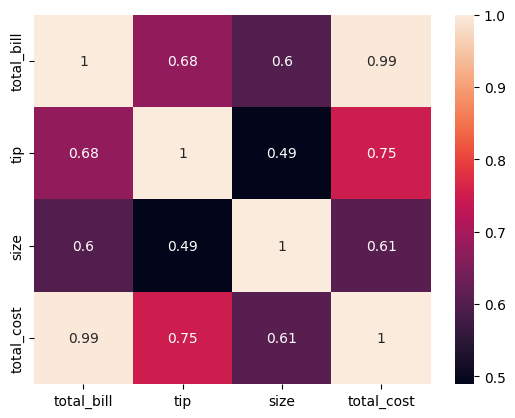

In [4]:
# Heatmap, use case 1 => visualization correlation
sns.heatmap(correlations, annot=True)

# If you have so many columns, heatmap start to hide them
#sns.heatmap(correlations, annot=True, xticklabels=True, yticklabels=True)

### Heatmap, use case 2 => Time series data

In [5]:
# Load example timeseries data
flights = sns.load_dataset('flights')

In [6]:
# Check head
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


<Axes: >

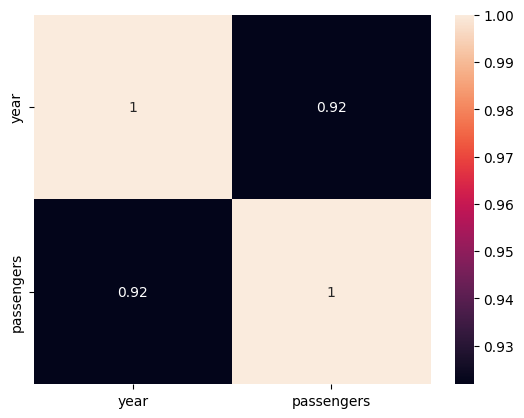

In [7]:
# With only correlation matrix, we can only say that
# amount of passengers has risen each year assuming connection is linear
correlations = flights.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

### Convert flighs-data into pivot table => better visualization

In [8]:
# Define index and columns => vime variables
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers')

In [9]:
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

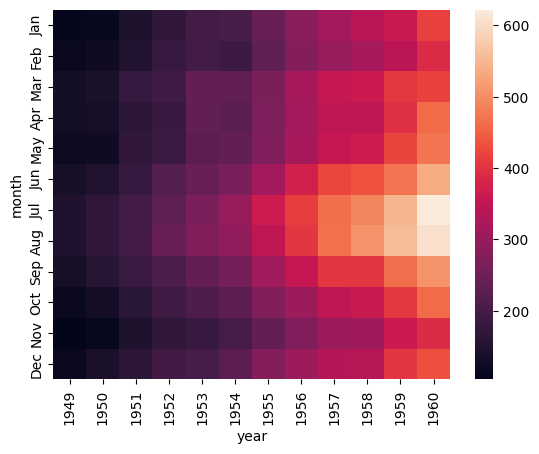

In [10]:
# Default color palette
sns.heatmap(flights_pivot)

<Axes: xlabel='year', ylabel='month'>

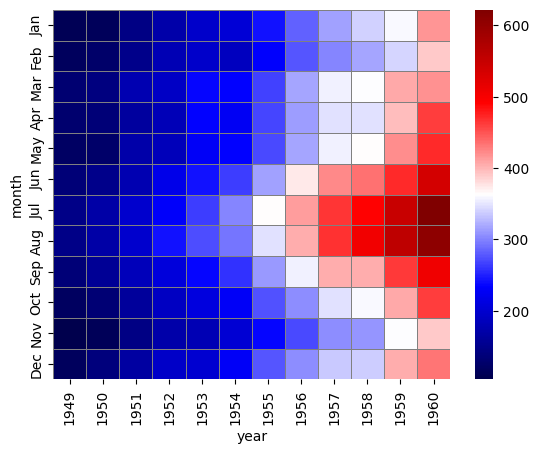

In [11]:
# Some different color palette
sns.heatmap(flights_pivot, cmap='seismic', linecolor='gray', linewidths=0.5)

### Clustermap give more insight

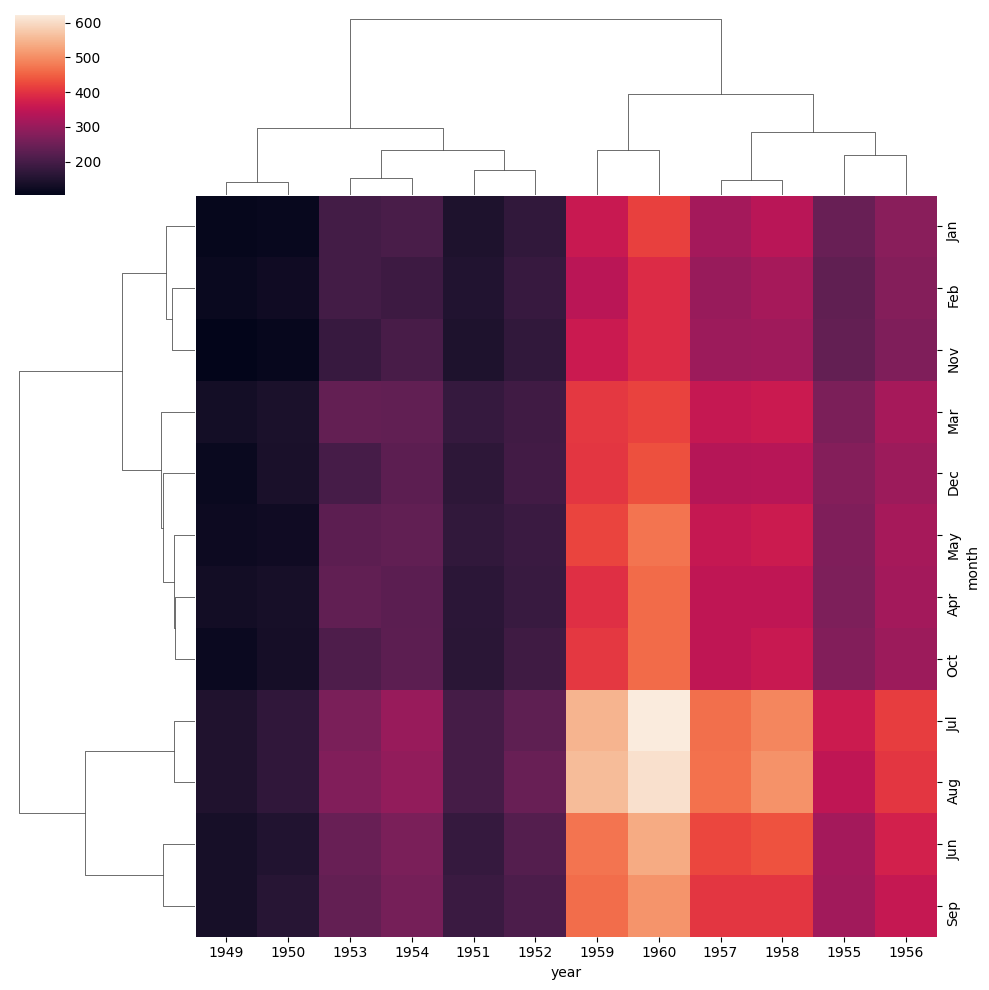

In [12]:
# Basic clustermap, group by years(columns) with similar trends
sns.clustermap(flights_pivot)

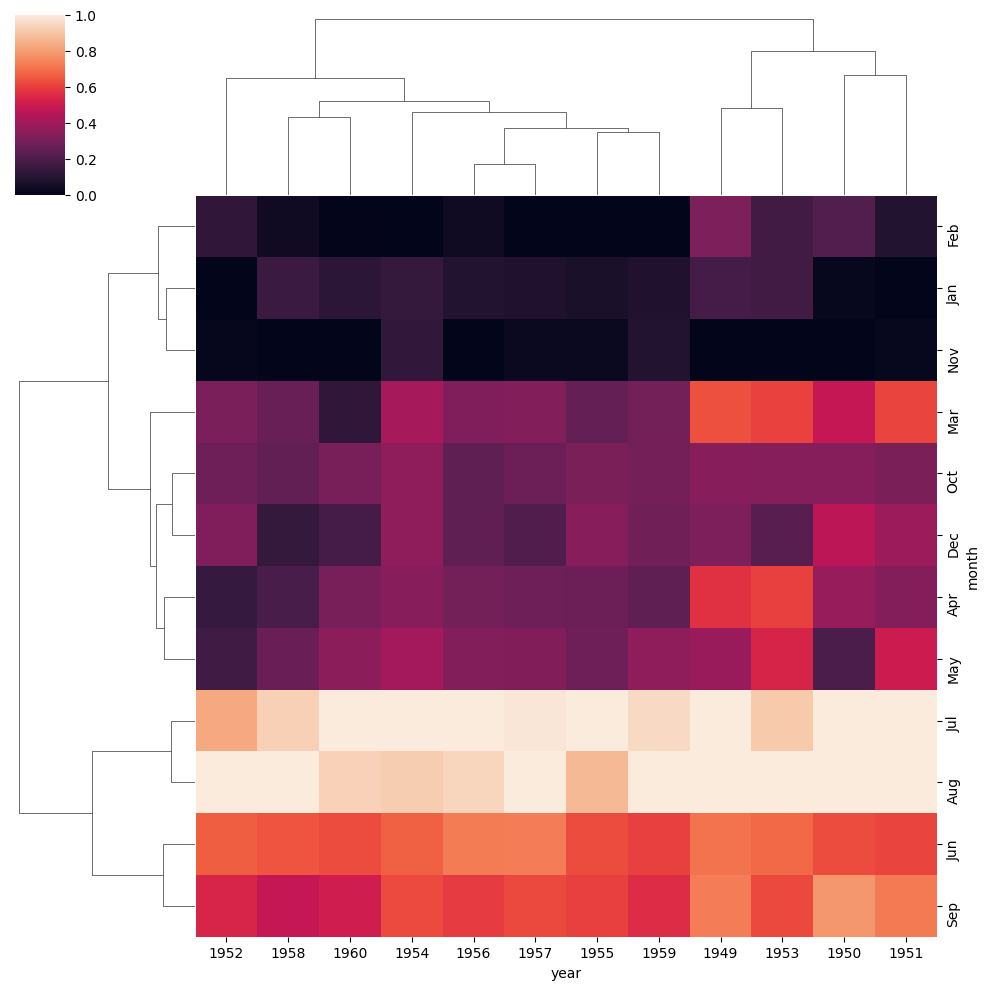

In [13]:
# Inverted clustermap, group by rows (months)
sns.clustermap(flights_pivot, standard_scale=1)